## WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
!pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import logging
import math

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

lat_lngs

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [4]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
city = cities


query_url = f"{base_url}appid={weather_api_key}&q={city}&units=imperial"

# Get weather data
#weather_response = requests.get(query_url).json()


In [5]:
cities_results = []

#Conversion of Kelvin to Fahrenheit


for index,city in enumerate(cities):
    
    base_url = "http://api.openweathermap.org/data/2.5/weather?"
    query_url = f"{base_url}appid={weather_api_key}&q={city}&units=imperial"

    print(f'found {city}')
          
    try:
        # Get weather data
        weather_response = requests.get(query_url).json()
        lon=weather_response["coord"]["lon"]
        lat=weather_response["coord"]["lat"]
        cities_results.append(weather_response)
        
        
    except:
        print(f"No City Data Found for {city}")

         
    
         




found sao filipe
found manokwari
found rikitea
found vaini
found nizhniy ingash
found illoqqortoormiut
No City Data Found for illoqqortoormiut
found hermanus
found ushuaia
found kimberley
found meulaboh
found siguiri
found bethel
found nikolskoye
found jamestown
found constitucion
found upernavik
found asadabad
found butaritari
found tasiilaq
found atuona
found carauari
found maniitsoq
found kodiak
found rolim de moura
No City Data Found for rolim de moura
found ponta do sol
found peace river
found albany
found caravelas
found thompson
found port elizabeth
found virginia beach
found puerto suarez
found saint-philippe
found killybegs
found manakara
found sobolevo
found tubruq
No City Data Found for tubruq
found coihaique
found wattegama
found chuy
found teknaf
found taolanaro
No City Data Found for taolanaro
found nanortalik
found pakxan
found petropavlovsk-kamchatskiy
found minot
found rawson
found pisco
found narsaq
found kahului
found padang
found mataura
found bredasdorp
found puert

found tsihombe
No City Data Found for tsihombe
found boyolangu
found kirakira
found jumla
found santa rosa
found ust-uda
found raga
found havre-saint-pierre
found kysyl-syr
found tessalit
found khuzdar
found san borja
found villa guerrero
found xining
found yulara
found makokou
found ciudad bolivar
found sibolga
found twentynine palms
found kargopol
found decatur
found danilov
found saint-joseph
found usinsk
found halifax
found havelock
found lahaina
found yaan
found sisimiut
found pacocha
found ibia
found port macquarie
found ixtapa
found saint-georges
found mehar
found longhua
found marsa matruh
found verkhnyaya inta
found sindor
found tubuala
found murgab
found te anau
found codrington
found tanete
found mauraro
found shimoda
found igarka
found bocas del toro
found harper
found kula
found ostrovnoy
found axim
found genhe
found meybod
found acuna
No City Data Found for acuna
found biak
found viligili
No City Data Found for viligili
found prince rupert
found codajas
found valreas
foun

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
len(cities_results)

558

In [7]:
city_data = []
for i,city in enumerate(cities_results):
    cityname = city["name"]
    citytemp = city["main"]["temp"]
    citymtemp = city["main"]["temp_max"]
    citylat = city["coord"]["lat"]
    cityhum = city["main"]["humidity"]
    citycloud = city["clouds"]["all"]
    citywind = city["wind"]["speed"]
    city_data.append(
        {"City": cityname,
        "Temperature": citytemp,
        "Max Temp": citymtemp,
        "Latitude": citylat,
        "Humidity %" : cityhum,
        "Cloudiness %" : citycloud,
        "Wind Speed" : citywind
        })


In [8]:
cities_res_df = pd.DataFrame(city_data)

In [9]:
cities_res_df

,City,Temperature,Max Temp,Latitude,Humidity %,Cloudiness %,Wind Speed
0,São Filipe,74.05,74.05,14.90,69,100,11.95
1,Manokwari,80.11,80.11,-0.87,73,98,6.44
2,Rikitea,77.16,77.16,-23.12,76,42,22.64
3,Vaini,78.80,78.80,-21.20,88,20,11.41
4,Nizhniy Ingash,19.69,19.69,56.20,97,100,5.84
...,...,...,...,...,...,...,...
553,Garbolovo,35.01,35.01,60.34,95,100,8.77
554,Kholm,33.03,33.03,59.27,97,100,6.17
555,Coruripe,80.78,80.78,-10.13,71,46,18.28
556,Bridlington,42.24,42.80,54.08,87,0,9.17


cities_res_df

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
#  Get the indices of cities that have humidity over 100%.

'100' in cities_res_df.values




False

In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [12]:
N/A


NameError: name 'N' is not defined

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

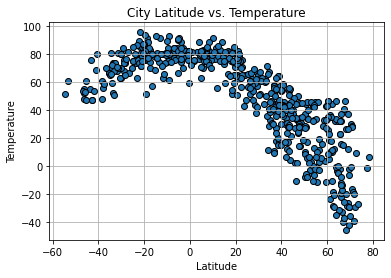

In [13]:
#Scatterplot showing the Latitude vs. Temperature

latitude = cities_res_df.iloc[:,3]
temperature = cities_res_df.iloc[:,1]
edgecolors = ['black']
plt.scatter(latitude, temperature, edgecolors=edgecolors)
plt.title("City Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.grid(b=True)
plt.show()


This Scatter Plot shows that the temperatures on this day indicate cities in the Northern Hemisphere are warmer. 

## Latitude vs. Humidity Plot

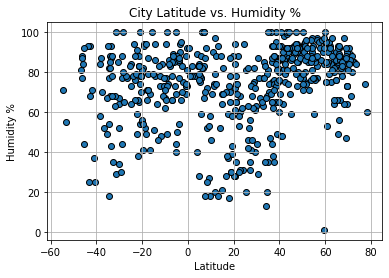

In [14]:
latitude = cities_res_df.iloc[:,3]
humidity = cities_res_df.iloc[:,4]
edgecolors = ['black']
plt.scatter(latitude, humidity, edgecolors=edgecolors)
plt.title("City Latitude vs. Humidity %")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.grid(b=True)
plt.show()

This Scatter Plot measures the the city's Latitude from the Equator/Prime Meridian relative to Humidity

## Latitude vs. Cloudiness Plot

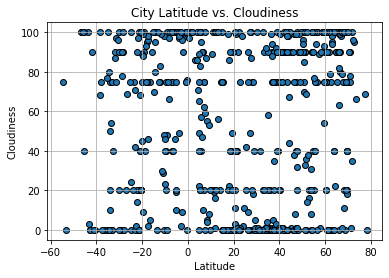

In [15]:
latitude = cities_res_df['Latitude']
cloudiness = cities_res_df['Cloudiness %']
edgecolors = ['black']
plt.scatter(latitude, cloudiness, edgecolors=edgecolors)
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(b=True)
plt.show()

This Scatter Plot show that Cloudiness appear equal relative to Latitude 

## Latitude vs. Wind Speed Plot

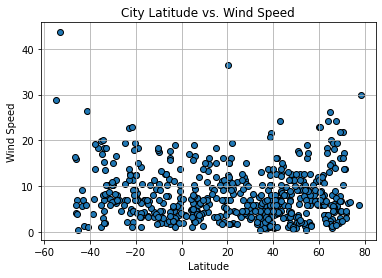

In [16]:
latitude = cities_res_df['Latitude']
windspeed = cities_res_df['Wind Speed']
edgecolors = ['black']
plt.scatter(latitude, windspeed, edgecolors=edgecolors)
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(b=True)
plt.show()

This Scatter Plot appers to indicate that Cities Latitude does not have a correlation to Wind Speed

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

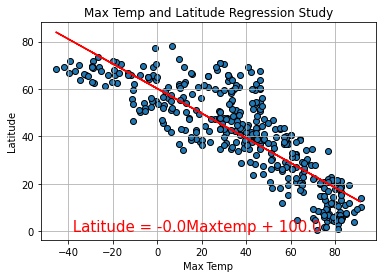

In [17]:
maxtemp = cities_res_df.loc[cities_res_df["Latitude"] >= 0.0]['Max Temp']
northlat = cities_res_df.loc[cities_res_df["Latitude"] >= 0.0]['Latitude']
edgecolors = ['black']
(slope, intercept, rvalue, pvalue, stderr) = linregress(maxtemp, northlat)
regress_values = maxtemp * slope + intercept
line_eq = " Latitude = " + str(round(slope,-2)) + "Maxtemp + " + str(round(intercept,-2))
plt.scatter(maxtemp, northlat, edgecolors=edgecolors)
plt.plot(maxtemp,regress_values,"r-")
plt.annotate(line_eq,(-40,-0),fontsize=15,color="red"),
plt.title("Max Temp and Latitude Regression Study")
plt.xlabel("Max Temp")
plt.ylabel("Latitude")
plt.grid(b=True)
plt.show()

In [ ]:
This regression reveals that cities closest to the equator in the Northern Hemisphere have the highest temperatires.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

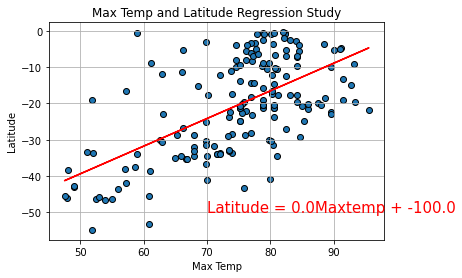

In [30]:
maxtemp = cities_res_df.loc[cities_res_df["Latitude"] < 0.0]['Max Temp']
southlat = cities_res_df.loc[cities_res_df["Latitude"] < 0.0]['Latitude']
edgecolors = ['black']
(slope, intercept, rvalue, pvalue, stderr) = linregress(maxtemp, southlat)
regress_values = maxtemp * slope + intercept
line_eq = "Latitude = " + str(round(slope,-2)) + "Maxtemp + " + str(round(intercept,-2))
plt.scatter(maxtemp, southlat, edgecolors=edgecolors)
plt.plot(maxtemp,regress_values,"r-")
plt.annotate(line_eq,(70,-50),fontsize=15,color="red")
plt.title("Max Temp and Latitude Regression Study")
plt.xlabel("Max Temp")
plt.ylabel("Latitude")
plt.grid(b=True)
plt.show()

In [ ]:
This regression indicates that the temperature increases closer to the Equtor

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

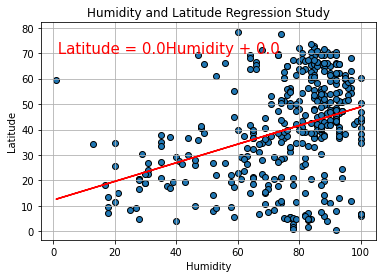

In [40]:
humidity = cities_res_df.loc[cities_res_df["Latitude"] >= 0.0]['Humidity %']
northlat = cities_res_df.loc[cities_res_df["Latitude"] >= 0.0]['Latitude']
edgecolors = ['black']
(slope, intercept, rvalue, pvalue, stderr) = linregress(humidity, northlat)
regress_values = humidity * slope + intercept
line_eq = " Latitude = " + str(round(slope,-2)) + "Humidity + " + str(round(intercept,-2))
plt.scatter(humidity, northlat, edgecolors=edgecolors)
plt.plot(humidity,regress_values,"r-")
plt.annotate(line_eq,(0, 70),fontsize=15,color="red"),
plt.title("Humidity and Latitude Regression Study")
plt.xlabel("Humidity")
plt.ylabel("Latitude")
plt.grid(b=True)
plt.show()

In [ ]:
This regression study indicates that the humidity increases the further north from the Equator a City is located.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

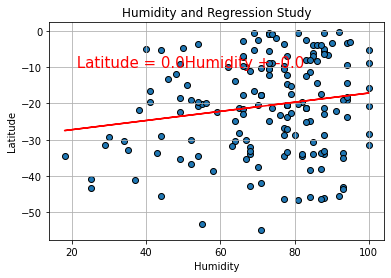

In [39]:
humidity = cities_res_df.loc[cities_res_df["Latitude"] < 0.0]['Humidity %']
southlat = cities_res_df.loc[cities_res_df["Latitude"] < 0.0]['Latitude']
edgecolors = ['black']
(slope, intercept, rvalue, pvalue, stderr) = linregress(humidity, southlat)
regress_values = humidity * slope + intercept
line_eq = " Latitude = " + str(round(slope,-2)) + "Humidity + " + str(round(intercept,-2))
plt.scatter(humidity, southlat, edgecolors=edgecolors)
plt.plot(humidity,regress_values,"r-")
plt.annotate(line_eq,(20, -10),fontsize=15,color="red"),
plt.title("Humidity and Regression Study")
plt.xlabel("Humidity")
plt.ylabel("Latitude")
plt.grid(b=True)
plt.show()

In [ ]:
Regression study which indicates that humidity increaes 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

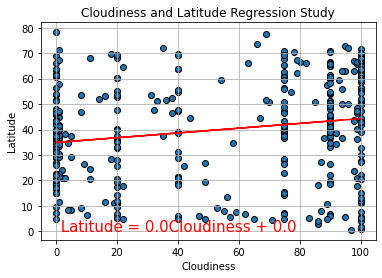

In [44]:
cloudiness = cities_res_df.loc[cities_res_df["Latitude"] >= 0.0]['Cloudiness %']
northlat = cities_res_df.loc[cities_res_df["Latitude"] >= 0.0]['Latitude']
edgecolors = ['black']
(slope, intercept, rvalue, pvalue, stderr) = linregress(cloudiness, northlat)
regress_values = cloudiness * slope + intercept
line_eq = " Latitude = " + str(round(slope,-2)) + "Cloudiness + " + str(round(intercept,-2))
plt.scatter(cloudiness, northlat, edgecolors=edgecolors)
plt.plot(cloudiness,regress_values,"r-")
plt.annotate(line_eq,(0, 0),fontsize=15,color="red"),
plt.title("Cloudiness and Latitude Regression Study")
plt.xlabel("Cloudiness")
plt.ylabel("Latitude")
plt.grid(b=True)
plt.show()

In [ ]:
There does not seem to be a correlation between distance from the equator and cloudiness.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

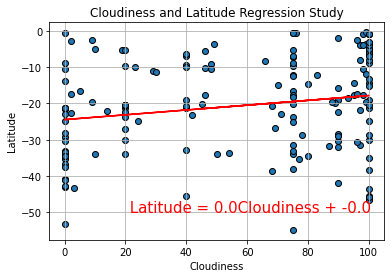

In [47]:
cloudiness = cities_res_df.loc[cities_res_df["Latitude"] < 0.0]['Cloudiness %']
southlat = cities_res_df.loc[cities_res_df["Latitude"] < 0.0]['Latitude']
edgecolors = ['black']
(slope, intercept, rvalue, pvalue, stderr) = linregress(cloudiness, southlat)
regress_values = cloudiness * slope + intercept
line_eq = " Latitude = " + str(round(slope,-2)) + "Cloudiness + " + str(round(intercept,-2))
plt.scatter(cloudiness, southlat, edgecolors=edgecolors)
plt.plot(cloudiness,regress_values,"r-")
plt.annotate(line_eq,(20, -50),fontsize=15,color="red"),
plt.title("Cloudiness and Latitude Regression Study")
plt.xlabel("Cloudiness")
plt.ylabel("Latitude")
plt.grid(b=True)
plt.show()

In [ ]:
There does not seem to be a correlation between distance from the equator and cloudiness.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

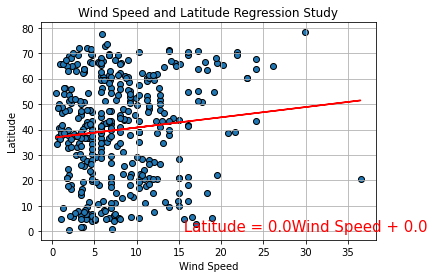

In [50]:
windspeed = cities_res_df.loc[cities_res_df["Latitude"] >= 0.0]['Wind Speed']
northlat = cities_res_df.loc[cities_res_df["Latitude"] >= 0.0]['Latitude']
edgecolors = ['black']
(slope, intercept, rvalue, pvalue, stderr) = linregress(windspeed, northlat)
regress_values = windspeed * slope + intercept
line_eq = " Latitude = " + str(round(slope,-2)) + "Wind Speed + " + str(round(intercept,-2))
plt.scatter(windspeed, northlat, edgecolors=edgecolors)
plt.plot(windspeed,regress_values,"r-")
plt.annotate(line_eq,(15, 0),fontsize=15,color="red"),
plt.title("Wind Speed and Latitude Regression Study")
plt.xlabel("Wind Speed")
plt.ylabel("Latitude")
plt.grid(b=True)
plt.show()

In [ ]:
Wind Speed and proximity to the Equator does not seem to be related.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

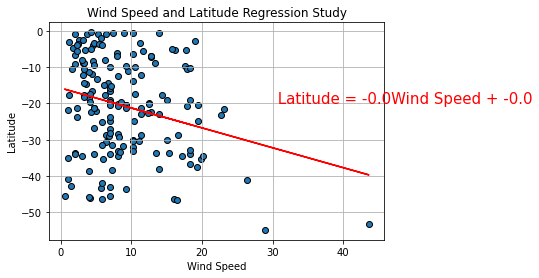

In [52]:
windspeed = cities_res_df.loc[cities_res_df["Latitude"] < 0.0]['Wind Speed']
southlat = cities_res_df.loc[cities_res_df["Latitude"] < 0.0]['Latitude']
edgecolors = ['black']
(slope, intercept, rvalue, pvalue, stderr) = linregress(windspeed, southlat)
regress_values = windspeed * slope + intercept
line_eq = " Latitude = " + str(round(slope,-2)) + "Wind Speed + " + str(round(intercept,-2))
plt.scatter(windspeed, southlat, edgecolors=edgecolors)
plt.plot(windspeed,regress_values,"r-")
plt.annotate(line_eq,(30, -20),fontsize=15,color="red"),
plt.title("Wind Speed and Latitude Regression Study")
plt.xlabel("Wind Speed")
plt.ylabel("Latitude")
plt.grid(b=True)
plt.show()

In [ ]:
Wind Speed and proximity to the Equator does not seem to be related.